# In this notebook, we explore how to detect Collinearity/Multicollinearity in dataset

## Intuition:
Before moving on to code, let us understand about what collinearity/multicollinearity is.<br>
It is a situation where two or more variables are highly correlated(have high correlation coefficient.)<br>
When such condition arises, one variable can predict what the variable would be. Such parameters in our set of predictor variables would cause a problem to the model.<br>
#### Why multicollinearity is a problem ?
1. It adds redundancy into our model. Increase in parameters would lead to increase in variance.
2. Least Squares Fit Algorithm would find it difficult to decide on which variable to give importance to (in the correlated variables).
#### Detection
1. Find correlation matrix and plot heatmap.
2. VIF(Variance Inflation Factor) - It indicates how much variance is inflated due to multicollinearity. Variables having high VIF would be collinear.

## Implementation

In [30]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# load dataset
# I will be using the California Housing Dataset
# 
data = pd.read_csv('housing.csv')

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
# since our main aim if to find if any variables are highly collinear,
# we just focus on the collinearity detection, I make some changes
# to dataset - like handling null values, encoding etc - which i won't
# be explaining in detail

# check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
# no null values
# we move to encoding
# variable 'ocean_proximity' is categorical - it must be encoded

data.groupby('ocean_proximity').count()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,9136,9136,9136,9136,9034,9136,9136,9136,9136
INLAND,6551,6551,6551,6551,6496,6551,6551,6551,6551
ISLAND,5,5,5,5,5,5,5,5,5
NEAR BAY,2290,2290,2290,2290,2270,2290,2290,2290,2290
NEAR OCEAN,2658,2658,2658,2658,2628,2658,2658,2658,2658


In [20]:
# there are 5 categories in 'ocean_proximity', we encode them
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['op_encoded'] = le.fit_transform(data['ocean_proximity'])

In [22]:
# make a new dataset such that it contains only numerical values
mod_data = data.drop(columns=['ocean_proximity'])

In [23]:
mod_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


This is the final data which we would be using.

### 1st method - Using Correlation Matrix/Heatmap

In [28]:
corr = mod_data.corr().round(2)

In [29]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_encoded
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05,-0.29
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14,0.20
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11,0.11
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13,-0.02
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05,-0.01
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02,-0.07
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07,-0.02
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69,-0.01
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00,0.08
op_encoded,-0.29,0.20,0.11,-0.02,-0.01,-0.07,-0.02,-0.01,0.08,1.00


Text(0.5, 1.0, 'Correlation Heatmap')

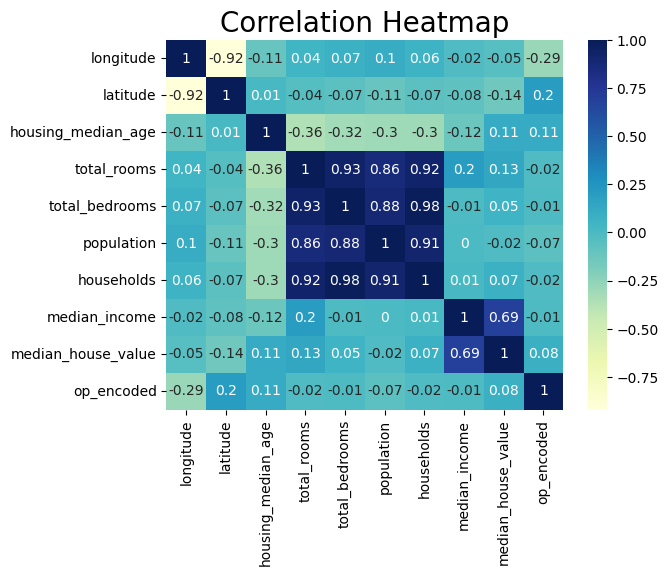

In [40]:
# it would be hard to understand which variables have high correlation
# from the correlation matrix

# so plot correlation heatmap
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.title("Correlation Heatmap",size=20)

From the above heatmap, we see that many variables in the data have high correlation. This would lead to multicollinearity.<br>
The variables
1. total_rooms
2. total_bedrooms
3. population
4. households
have high correlation coefficients >0.8 - this introduces redundancy.

### 2nd Method - Variance Inflation Factor